# New York City Asian Hate
Going through New York City hate crime data from [NYC Open data](https://data.cityofnewyork.us/Public-Safety/NYPD-Hate-Crimes/bqiq-cu78) to see if hate crimes against asians have been increased since COVID-19 pandemic.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/NYPD_Hate_Crimes.csv', index_col='Full Complaint ID')

In [2]:
df.head()

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
Full Complaint ID,,,,,,,,,,,,,
201904612204817,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,02/08/2019,B31678218
201904812229517,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682790
201904812226617,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692174


## In general, did hate crime in NYC increase or decrease in last three years?

<AxesSubplot:ylabel='year'>

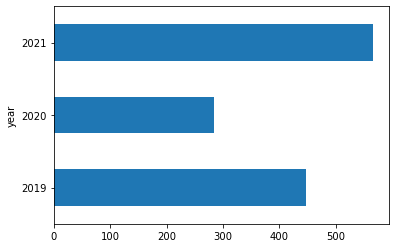

In [3]:
df.rename(columns={'Complaint Year Number':'year', 'Bias Motive Description':'motive'}, inplace=True)
df2 = df[['year', 'motive']]
df2.groupby('year').size().plot.barh()

In [44]:
filt = df.groupby(['year']).size().reset_index(name='counts')
filt.set_index('year', inplace=True)
c19 = filt.loc[2019, ['counts']]
c21 = filt.loc[2021, ['counts']]
change = ((c21 - c19) / c19) * 100
print(change.to_string(index=False))

26.39821


Hate crimes in NYC increased by 26% in 2021 from 2019. The drop in 2020 from 2019 must be because of COVID-19 lockdown that people were unable to go outside other than essential workers.
Next, we are going to look at what hate crime motivations are.
The below chart is top 5 motivation of hate crime in NYC.

In [24]:
df3 = df.loc[(df['motive'] == 'ANTI-WHITE') | 
       (df['motive'] == 'ANTI-BLACK') |
       (df['motive'] == 'ANTI-ASIAN') | 
       (df['motive'] == 'ANTI-JEWISH') |
       (df['motive'] == 'ANTI-MALE HOMOSEXUAL(GAY)') ]
df3 = df3[['year', 'motive']]

<AxesSubplot:xlabel='year'>

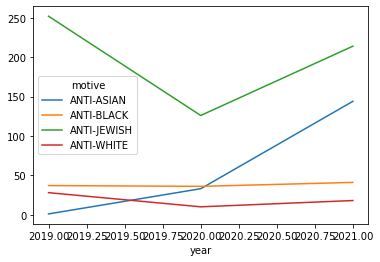

In [25]:
piv = pd.pivot_table(df3, index='year', columns='motive', aggfunc=len, fill_value=0)
piv.plot()

In [42]:
a19 = piv.at[2019, 'ANTI-ASIAN']
a21 = piv.at[2021, 'ANTI-ASIAN']
change_asian = ((a21 - a19) / a19) * 100
print(change_asian)

14300.0


Hate crime against Asian has been increased by 14300% since COVID-19 Lockdown. It's safe to say that it is not good time to go back to NYXC even for the job you wanted as asian. In result of this analysis, I will decline my job offer.